In [1]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

__TODO: the whole thing__

## 1
Exercise of prediction using immobile / mobile trips

In [2]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

In [3]:
# Predict MeanSOG from all the data (including a lot of immobile ships)

from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

predictions, y_test = knn_regression(static_data, x, y)

pred = []
for element in predictions:
    pred.append(element[0])

print(mean_absolute_error(predictions, y_test))

pd.Series(pred).plot.hist()
plt.show()

plt.bar(np.arange(len(pred)), pred)
plt.show()

plt.boxplot(predictions)
plt.show()

1.2733923934326852


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2.8503720152323386


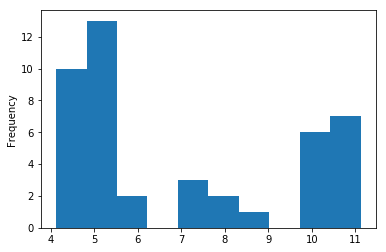

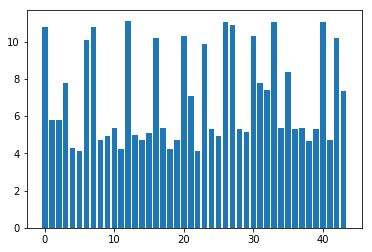

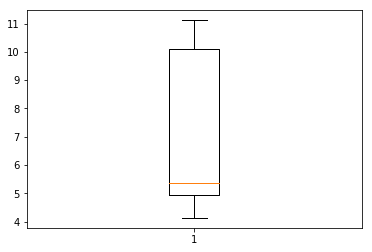

In [4]:
# Predict MeanSOG from only ships with MeanSOG > 1

from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

df = static_data.loc[static_data['MeanSOG'] >= 1]

predictions, y_test = knn_regression(df, x, y)

pred = []
for element in predictions:
    pred.append(element[0])

print(mean_absolute_error(predictions, y_test))

pd.Series(pred).plot.hist()
plt.show()

plt.bar(np.arange(len(pred)), pred)
plt.show()

plt.boxplot(predictions)
plt.show()

0.04326256486970714


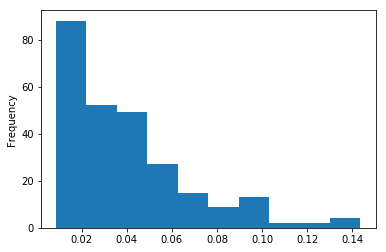

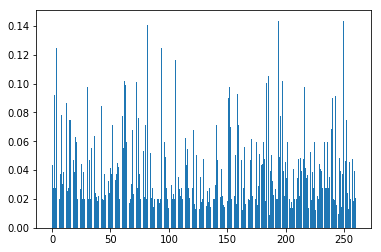

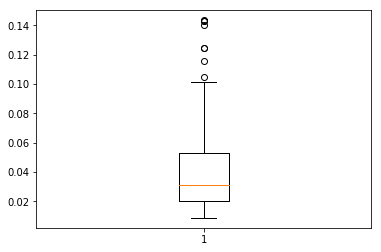

In [5]:
# Predict MeanSOG from only ships with MeanSOG < 1

from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

df = static_data.loc[static_data['MeanSOG'] < 1]

predictions, y_test = knn_regression(df, x, y)

pred = []
for element in predictions:
    pred.append(element[0])

print(mean_absolute_error(predictions, y_test))

pd.Series(pred).plot.hist()
plt.show()

plt.bar(np.arange(len(pred)), pred)
plt.show()

plt.boxplot(predictions)
plt.show()

## 2
Exercise of prediction with a lot of identical data vs. normal dataset (error in copy)

In [6]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

We choose a row without a lot of missing values.

In [7]:
static_data.head()

,TripID,MMSI,MeanSOG,VesselName,IMO,CallSign,VesselType,Length,Width,Draft,Cargo,DepTime,ArrTime,DepLat,DepLon,ArrLat,ArrLon,DepCountry,DepCity,ArrCountry,ArrCity,Duration
0,1,367114690,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:06,2017-01-01 02:40:45,48.51094,-122.60705,48.51095,-122.60705,US,Anacortes,US,Anacortes,0 days 02:40:39
1,2,367479990,6.536585,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,83.39,19.5,3.2,NaN,2017-01-01 00:00:03,2017-01-01 02:40:44,48.15891,-122.67268,48.11099,-122.75885,US,Coupeville,US,Port Townsend,0 days 02:40:41
2,3,368319000,0.000758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:08,2017-01-01 02:44:48,43.34576,-124.32142,43.34578,-124.32141,US,Barview,US,Barview,0 days 02:44:40
3,4,367154100,6.871111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:15,2017-01-01 02:33:28,46.74264,-124.93125,47.02928,-124.95153,US,Ocean Shores,US,Ocean Shores,0 days 02:33:13
4,5,367446870,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:59,2017-01-01 02:42:54,48.51320,-122.60718,48.51318,-122.60699,US,Anacortes,US,Anacortes,0 days 02:41:55


We create a few different datasets by copying this row 10 times, 100 times, 1000 times, 10000 times.

In [8]:
%%time
line = static_data.loc[1]
df10 = static_data.append(line)
df10.name = 'df10'
for i in range(9):
    df10 = df10.append(line)

Wall time: 66 ms


In [9]:
%%time
line = static_data.loc[1]
df100 = df10.append(line)
df100.name = 'df100'
for i in range(89):
    df100 = df100.append(line)

Wall time: 468 ms


In [10]:
%%time
line = static_data.loc[1]
df1000 = df100.append(line)
df1000.name = 'df1000'
for i in range(889):
    df1000 = df1000.append(line)

Wall time: 4.7 s


In [11]:
%%time
line = static_data.loc[1]
df10000 = df1000.append(line)
df10000.name = 'df10000'
for i in range(8889):
    df10000 = df10000.append(line)

Wall time: 56.7 s


In [12]:
static_data.describe()

,TripID,MMSI,MeanSOG,VesselType,Length,Width,Draft,Cargo,DepLat,DepLon,ArrLat,ArrLon
count,1520.000000,1.520000e+03,1520.000000,1287.000000,1220.000000,911.000000,496.000000,378.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,3.597421e+08,1.034825,971.680653,56.769590,13.104501,6.457056,50.515873,46.354331,-122.868905,46.353671,-122.871346
std,438.930518,6.263661e+07,2.936439,198.957887,74.739358,10.903338,4.607529,22.693810,3.766705,0.681947,3.762056,0.680604
min,1.000000,3.160089e+06,-0.100000,0.000000,6.710000,0.000000,0.000000,0.000000,32.220640,-125.995610,32.209370,-125.998590
25%,380.750000,3.380724e+08,0.000000,1004.000000,14.840000,5.500000,3.000000,31.000000,46.168652,-123.178480,46.168460,-123.168262
50%,760.500000,3.669802e+08,0.012633,1019.000000,22.340000,8.000000,4.650000,52.000000,47.647795,-122.651365,47.646925,-122.645290
75%,1140.250000,3.675663e+08,0.072000,1019.000000,41.277500,16.350000,10.025000,70.000000,48.656940,-122.386562,48.665710,-122.386607
max,1520.000000,9.876543e+08,20.360811,1025.000000,349.000000,50.000000,18.800000,99.000000,49.890740,-120.002920,49.832120,-120.002420


In [13]:
for df in [df10, df100, df1000, df10000]:
    print(df.describe())

            TripID          MMSI      MeanSOG   VesselType       Length  \
count  1530.000000  1.530000e+03  1530.000000  1297.000000  1230.000000   
mean    755.542484  3.597927e+08     1.070784   971.991519    56.986016   
std     441.744387  6.243456e+07     2.960229   198.220215    74.473078   
min       1.000000  3.160089e+06    -0.100000     0.000000     6.710000   
25%     373.250000  3.380754e+08     0.000000  1004.000000    14.910000   
50%     755.500000  3.669823e+08     0.013043  1019.000000    22.620000   
75%    1137.750000  3.675648e+08     0.075694  1019.000000    43.715000   
max    1520.000000  9.876543e+08    20.360811  1025.000000   349.000000   

            Width       Draft       Cargo       DepLat       DepLon  \
count  921.000000  506.000000  378.000000  1530.000000  1530.000000   
mean    13.173941    6.392688   50.515873    46.366126  -122.867623   
std     10.864177    4.584196   22.693810     3.757184     0.679897   
min      0.000000    0.000000    0.00000

df: MAE = 1.2733923934326852
df10: MAE = 1.157407804442135
df100: MAE = 1.23786706177166
df1000: MAE = 0.9026804630340876
df10000: MAE = 0.20197894745555736


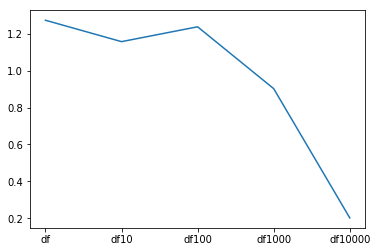

In [14]:
# Comparison of prediction of MeanSOG with normal static data and copied datasets

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

errors = [[], []]

static_data.name = 'df'
df10.name = 'df10'
df100.name = 'df100'
df1000.name = 'df1000'
df10000.name = 'df10000'

for df in [static_data, df10, df100, df1000, df10000]:
    predictions, y_test = knn_regression(df, x, y)
    error = mean_absolute_error(predictions, y_test)
    print(df.name + ': MAE = ' + str(error))
    
    errors[0].append(df.name)
    errors[1].append(error)
    
plt.plot(errors[0], errors[1])

## 3
More ideas
+ Try to predict with something that does not make sense (example: using ID attribute as a number)
+ or using Length as a category
+ mixing regression and classification

In [15]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

In [16]:
# Prediction of Width from Length or TripID

from sklearn.metrics import mean_absolute_error

x = ['Length']
y = ['Width']
pred, ytest = knn_regression(static_data, x, y)
print('MAE with Length: ' + str(mean_absolute_error(pred, ytest)))

x = ['Length', 'TripID']
y = ['Width']
pred, ytest = knn_regression(static_data, x, y)
print('MAE with Length and TripID: ' + str(mean_absolute_error(pred, ytest)))

x = ['TripID']
y = ['Width']
pred, ytest = knn_regression(static_data, x, y)
print('MAE with TripID: ' + str(mean_absolute_error(pred, ytest)))

print('Baseline: mean = ' + str(static_data['Width'].mean()))

MAE with Length: 2.73451052631579
MAE with Length and TripID: 3.8834960526315796
MAE with TripID: 7.796980263157895
Baseline: mean = 13.10450054884743


In [17]:
# Prediction of Width from Length: comparison regression and classification

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

x = ['Length']
y = ['Width']

df = static_data.copy()
df = df.dropna()

pred, ytest = knn_regression(df, x, y)

print('MAE with regression: ' + str(mean_absolute_error(pred, ytest)))

df2 = static_data.copy()
df2 = df2.dropna()
df2['Width'] = df2['Width'].astype('int')
df2['Width'] = df2['Width'].astype('category')

pred, ytest = knn_classification(df2, x, y)

print('Accuracy with classification: ' + str(accuracy_score(pred, ytest)))

MAE with regression: 2.0717238095238097
Accuracy with classification: 0.38095238095238093


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
